In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf

In [9]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [10]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

In [11]:
companies = ["^AEX", "ASML.AS", "AIR","ING", "WKL.AS", "STLA", "AD.AS", "PHG", "^FVX","^TNX", "^TYX"]

combined_Data = []
for i in companies:
    asml1 = yf.Ticker(i)
    hist = asml1.history(period="max")

    #align dates
    stck = pd.DataFrame(hist['Close'])
    stck['newDate'] = stck.index
    stck.index = stck['newDate'].dt.strftime('%Y-%m-%d')
    stck.drop(columns=['newDate'], inplace=True)
    stck.columns = [i]

    combined_Data.append(stck)


In [12]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), combined_Data)
df_merged.index = pd.to_datetime(df_merged.index)
df_merged.tail()

,^AEX,ASML.AS,AIR,ING,WKL.AS,STLA,AD.AS,PHG,^FVX,^TNX,^TYX
newDate,,,,,,,,,,,
2024-11-15,862.500000,635.000000,66.150002,15.740,151.649994,13.340,32.130001,25.840000,4.298,4.428,4.601
2024-11-18,865.369995,629.599976,66.500000,15.890,153.949997,13.390,32.610001,25.950001,4.277,4.414,4.606
2024-11-19,861.979980,624.700012,67.349998,15.800,153.300003,13.050,32.560001,25.969999,4.246,4.379,4.565
2024-11-20,858.570007,616.500000,67.540001,15.690,152.949997,12.850,32.660000,26.309999,4.275,4.406,4.592
2024-11-21,866.349976,631.799988,68.419998,15.545,153.449997,12.805,32.290001,26.215000,4.279,4.408,4.598


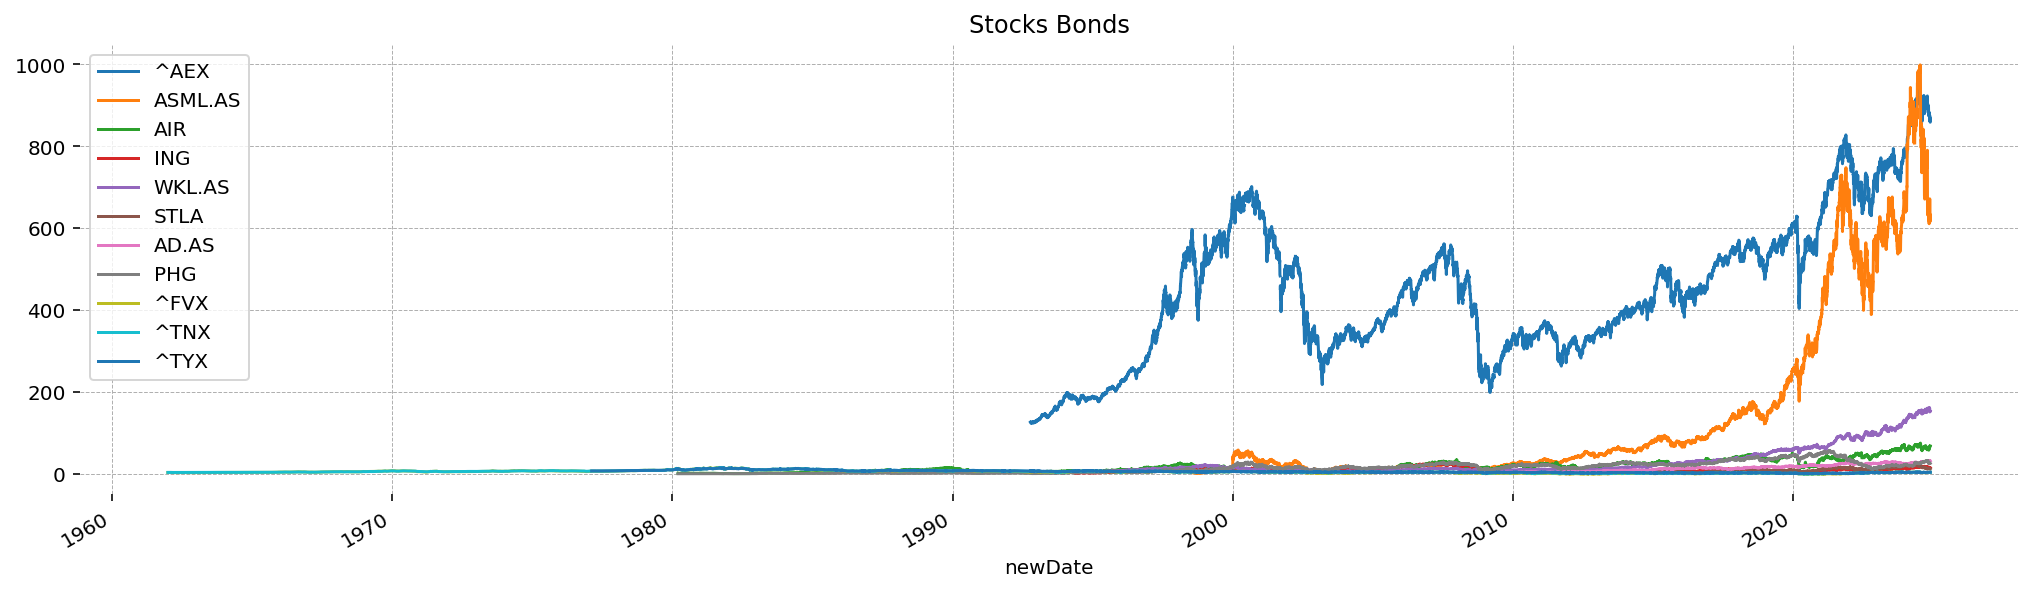

In [13]:

df_merged.plot(title='Stocks Bonds', grid=True);

In [14]:
aex_monthly = df_merged.resample('1MS').mean()
aex_monthly = aex_monthly.loc["1995-01-01":,]

aex_monthly.to_csv(output + "aex_stocks_bonds_mo.csv")